In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"macrodata.csv" , index_col = 0 ,parse_dates = True)

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [5]:
# lamb = 1600 for quaterly data

gdp_cycle , gdp_trend = hpfilter(df['realgdp'] , lamb = 1600)

In [27]:
df['gdp_trend']  = gdp_trend
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468


In [7]:
airline = pd.read_csv(r"airline_passengers.csv" , index_col = "Month" , parse_dates = True)

In [28]:
airline.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [9]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
# Incase there are some missing data , use below syntax
# airline.dropna()  # to delete missing data rows

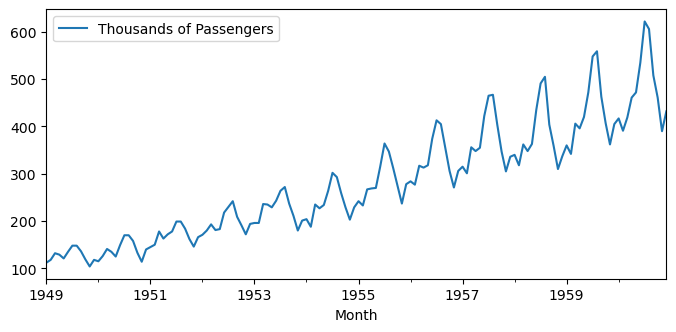

In [29]:
# plotting
airline.plot(kind = 'line' , figsize = (8,3.5))
plt.show()

# so some 'trend' and 'seasonality' are there.

## <span style = 'background:lightblue'> 3. ETS (Error-Trend-Seasonality) Decomposition </span>

- <div class = "alert alert-success">The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS).
</div>

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative') 

In [31]:
result.trend.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64

In [20]:
result.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: seasonal, dtype: float64

In [26]:
result.resid.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: resid, dtype: float64

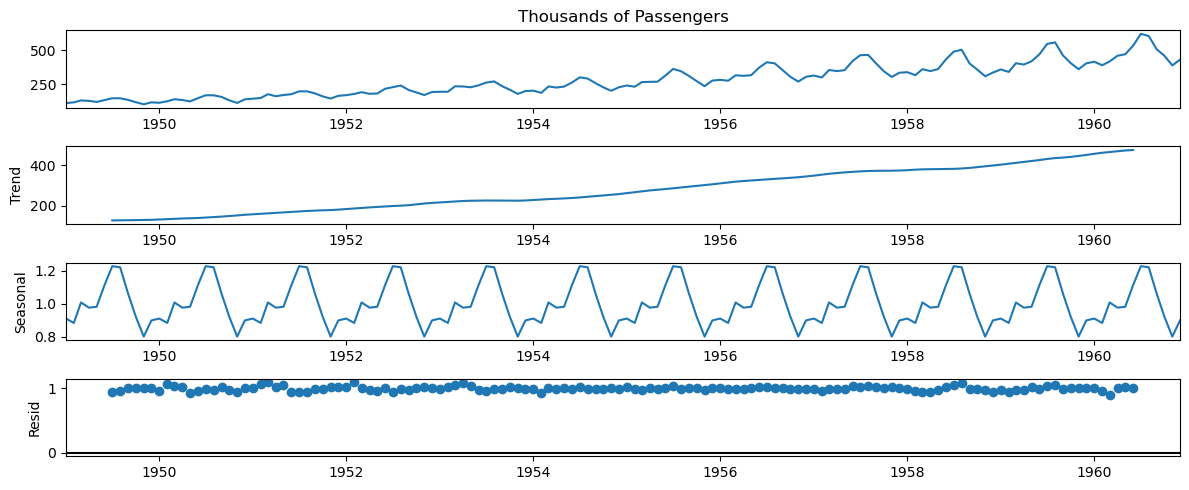

In [35]:
from pylab import rcParams

rcParams['figure.figsize'] = (12,5)
result.plot() ;

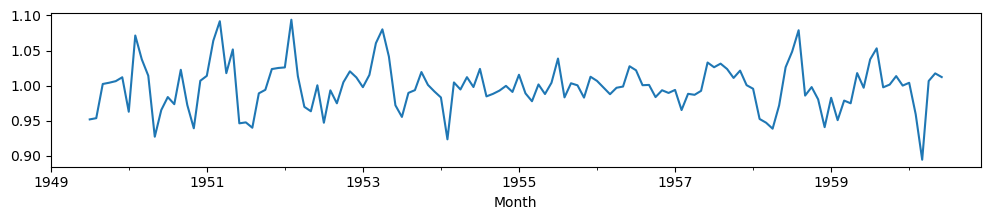

In [32]:
residual = result.resid
residual.plot(kind = 'line' , figsize = (12,2))
plt.show()